# Proyecto 4: Expresiones regulares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import shutil

## Leer y guardar todos los archivos

Primero descomprimiremos el archivo zip que tiene los archivos csv

Utilizando la libreia shutil

shutil.unpack_archive('socialnetworks.zip', 'socialnetworks')

Lo que hicimos fue descomprimir el archivo con el nombre de socialnetworks y posteriormente analizar que archivos cumplen con el patron para identificar aquellos que tengan en el nombre un mes, y aquellos que no

In [2]:
ruta_zip = 'socialnetworks.zip'
ruta_destino = '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks'
shutil.unpack_archive(ruta_zip,ruta_destino)
patron = r'2022'
archivos_econtrados_mes = []
archivos_econtrados_sin_mes = []

Ahora lo que haremos, sera recorrer los archivos que descomprimimos y buscamos los que tengan el año 2022

In [3]:
# Recorreremos cada carpeta

for carpeta, subcarpetas, archivos in os.walk(ruta_destino):
    for archivo in archivos:
        ruta_completa = os.path.join(carpeta, archivo)
        
        if archivo.endswith('.csv'):
            # Verificar si el archivo tiene una fecha en su nombre
            fecha_encontrada = re.search(patron, archivo)
            
            if fecha_encontrada:
                archivos_econtrados_mes.append(ruta_completa)
            else:
                archivos_econtrados_sin_mes.append(ruta_completa)

In [4]:
len(archivos_econtrados_mes)

24

In [5]:
len(archivos_econtrados_sin_mes)
archivos_econtrados_sin_mes

['/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - instagram.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - youtube.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - tiktok.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/socialnetworks/social media influencers - instagram.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/socialnetworks/social media influencers - youtube.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/socialnetworks/social media influencers - tiktok.csv']

Ya que tenemos los archivos separados en un arreglo, los podemos abrir en los dataframes que nos piden

In [6]:
Instagram = []
Patron_Insta = r'INSTAGRAM|instagram|Instagram'

Tik_tok = []
Patron_Tik_tok = r'TIKTOK|tiktok|Tiktok'

Youtube = []
Patron_Youtube = r'Youtube|youtube|YOUTUBE'

In [7]:
# Haremos una función que encuentre los patrones que le pasemos en un arreglo
# Y los guarde en cierto arreglo, para que sea más fácil hacer los dataframes

def patrones(arreglo, patron, arreglo_para_guardar):
    for i in arreglo:
        r = re.search(patron, i)
        if r:
            arreglo_para_guardar.append(i)

In [8]:
patrones(archivos_econtrados_mes, Patron_Insta, Instagram)
patrones(archivos_econtrados_mes, Patron_Tik_tok, Tik_tok)
patrones(archivos_econtrados_mes, Patron_Youtube, Youtube)

## Archivos sin mes (Resumen de cada red social)

Ya que tenemos todos los archivos de las redes sociales por separado, abriremos los dataframes que no tienen fecha

In [9]:
df_Insta_s_f = pd.read_csv(archivos_econtrados_sin_mes[0])
df_Tik_tok_s_f = pd.read_csv(archivos_econtrados_sin_mes[2])
df_Youtube_s_f = pd.read_csv(archivos_econtrados_sin_mes[1])

In [10]:
df_Insta_s_f.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [11]:
df_Tik_tok_s_f.head()

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K


In [12]:
df_Youtube_s_f.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


## Archivos con mes

Ahora, como se solicita que los archivos cuyo nombre tenga un mes, tambien tengan una columna que lo indique, se le agregará a cada uno

### Instagram

In [13]:
Instagram

['/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-instagram - -nov 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-instagram june 2022 - june 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-INSTAGRAM - -DEC 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - instagram sep-2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/socialnetworks/social media influencers-instagram - -nov 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/socialnetworks/social media influencers-instagram june 20

In [14]:
# Archivo de Instagram - noviembre
df_I_Nov = pd.read_csv(Instagram[0])
df_I_Nov['Month'] = 'November'
df_I_Nov.head(2)

,s.no,Name,Instagram Name,Category-1,Followers,\nCountry,Eng. (Auth.),Eng. (Avg.),Category-2,Month
0,1,cristiano,Cristiano Ronaldo,Sports with a ball,483.1M,India,4.5M,5.6M,NaN,November
1,2,kyliejenner,Kylie 🤍,Fashion,370M,United States,2.8M,4.4M,Modeling,November


In [15]:
# Archivo de Instagram - junio
df_I_June = pd.read_csv(Instagram[1])
df_I_June['Month'] = 'June'
df_I_June.head(2)

,instagram name,influencer name,Category_1,Category_2,Subscribers count,Views avg.,Likes avg,Comments avg.,Month
0,433,433,Sports with a ball,NaN,50.7M,Spain,274.9K,456.7K,June
1,____kimwoobin,김우빈,Lifestyle,NaN,3.6M,Indonesia,449.4K,592.7K,June


In [16]:
# Archivo de Instagram - diciembre
df_I_Dec = pd.read_csv(Instagram[2])
df_I_Dec['Month'] = 'December'
df_I_Dec.head(2)

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.),Month
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M,December
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M,December


In [17]:
# Archivo de Instagram - septiembre
df_I_Sep = pd.read_csv(Instagram[3])
df_I_Sep['Month'] = 'September'
df_I_Sep.head(2)

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement\n,Engagement average\r\n,Category_1,Category_2,Month
0,1,cristiano,Cristiano Ronaldo,477.9M,India,5M,6.2M,Sports with a ball,NaN,September
1,2,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling,September


Una vez que cada DataFrame contiene los meses, se concatenan en uno solo y se limpia

In [18]:
# Concatenar los DataFrames de Instagram en un solo DataFrame
df_Insta = pd.concat([df_I_June, df_I_Sep, df_I_Nov, df_I_Dec], axis=0, ignore_index=True)

# Verificar el DataFrame resultante
df_Insta.head()

,instagram name,influencer name,Category_1,Category_2,Subscribers count,Views avg.,Likes avg,Comments avg.,Month,S.no,...,Category-1,Followers,\nCountry,Eng. (Auth.),Eng. (Avg.),Category-2,Rank,name,followers,country
0,433,433,Sports with a ball,NaN,50.7M,Spain,274.9K,456.7K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,____kimwoobin,김우빈,Lifestyle,NaN,3.6M,Indonesia,449.4K,592.7K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,__youngbae__,TAEYANG,Music,NaN,13.4M,Indonesia,269.6K,304.1K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.6M,Russia,164.4K,189.4K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_hakkencoser_,Hakken 八犬,Lifestyle,Photography,3.5M,United States,525.1K,643K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Limpieza del DataFrame de Instagram
    # Combinar las columnas que se refieren a la misma información y eliminar las que ya no se necesitan
#Username
df_Insta['Username'] = df_Insta['Instagram Name'].combine_first(df_Insta['instagram name']).combine_first(df_Insta['Instagram name'])
df_Insta = df_Insta.drop(['Instagram Name','instagram name','Instagram name'], axis=1)
#Name
df_Insta['Name'] = df_Insta['Name'].combine_first(df_Insta['influencer name ']).combine_first(df_Insta['name']).combine_first(df_Insta[' Name'])
df_Insta = df_Insta.drop(['influencer name ','name',' Name'], axis=1)
#Subscribers o Followers
df_Insta['Subscribers o Followers'] = df_Insta['Subscribers'].combine_first(df_Insta['Subscribers count']).combine_first(df_Insta['followers']).combine_first(df_Insta['Followers'])
df_Insta = df_Insta.drop(['Subscribers','Subscribers count','followers','Followers'], axis=1)
#Country
df_Insta['Country'] = df_Insta['Audience country'].combine_first(df_Insta['Views avg.']).combine_first(df_Insta['country']).combine_first(df_Insta['\nCountry'])
df_Insta = df_Insta.drop(['Audience country','Views avg.','country','\nCountry'], axis=1)
#Authentic
df_Insta['Authentic'] = df_Insta['Authentic engagement\n'].combine_first(df_Insta['Eng. (Auth.)']).combine_first(df_Insta['Likes avg'])
df_Insta = df_Insta.drop(['Authentic engagement\n','Eng. (Auth.)','Likes avg'], axis=1)
#Engagement
df_Insta['Engagement'] = df_Insta['Engagement average\r\n'].combine_first(df_Insta['Eng. (Avg.)']).combine_first(df_Insta['Comments avg.'])
df_Insta = df_Insta.drop(['Engagement average\r\n','Eng. (Avg.)','Comments avg.'], axis=1)
#Category1
df_Insta['Category1'] = df_Insta['Category-1'].combine_first(df_Insta['Category_1'])
df_Insta = df_Insta.drop(['Category-1','Category_1'], axis=1)
#Category2
df_Insta['Category2'] = df_Insta['Category-2'].combine_first(df_Insta['Category_2'])
df_Insta = df_Insta.drop(['Category-2','Category_2'], axis=1)
#Borrar datos inecesarios
df_Insta = df_Insta.drop(['s.no','S.no','Rank'], axis=1)

In [20]:
# Verificar el DataFrame de Instagram resultante
df_Insta

,Month,Name,Username,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2
0,June,433,433,50.7M,Spain,274.9K,456.7K,Sports with a ball,NaN
1,June,김우빈,____kimwoobin,3.6M,Indonesia,449.4K,592.7K,Lifestyle,NaN
2,June,TAEYANG,__youngbae__,13.4M,Indonesia,269.6K,304.1K,Music,NaN
3,June,НАСТЯ ИВЛЕЕВА,_agentgirl_,18.6M,Russia,164.4K,189.4K,Shows,NaN
4,June,Hakken 八犬,_hakkencoser_,3.5M,United States,525.1K,643K,Lifestyle,Photography
...,...,...,...,...,...,...,...,...,...
4067,December,thiago6,Thiago Alcantara,10.4M,United Kingdom,129.9K,222.7K,Sports with a ball,NaN
4068,December,soycintiacossio,Cintia Cossio,6M,Colombia,313.4K,390.6K,Modeling,Adult content
4069,December,feat.dino,이찬,2.7M,South Korea,716.6K,876.4K,Lifestyle,NaN
4070,December,djokernole,Novak Djokovic,11.8M,United States,158.6K,197.5K,Sports with a ball,NaN


In [21]:
df_Insta.isna().sum()

Month                         0
Name                         47
Username                     41
Subscribers o Followers       0
Country                       9
Authentic                     0
Engagement                   16
Category1                   441
Category2                  2852
dtype: int64

In [22]:
df_Insta = df_Insta.drop_duplicates()

In [23]:
df_Insta=df_Insta.dropna()

In [24]:
df_Insta.shape

(1168, 9)

Se realizan los mismos pasos anteriores para los otros dos DataFrames de TikTok y Youtube

### TikTok

In [25]:
Tik_tok

['/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-tiktok - ---nov 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - Tiktok sep 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-tiktok june 2022 - june 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-TIKTOK - ---DEC 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/socialnetworks/social media influencers-tiktok - ---nov 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/socialnetworks/social media influencers - Tiktok sep 2022.csv',
 '

In [26]:
#ARCHIVO DE NOVIEMBRE
df_T_Nov = pd.read_csv(Tik_tok[0])
df_T_Nov['Month'] = 'November'
df_T_Nov.drop(['row-cell'], axis=1, inplace=True)
df_T_Nov.head(2)

,Tiktoker name,Tiktok name,\nFollowers,Views (Avg.),Likes (Avg.),Comments (Avg.),Shares (Avg.),Month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,November
1,yossikramer,Yossi,145.6K,26.8M,2.2M,30.1K,71.2K,November


In [27]:
# ARCHIVO DE SEPTIEMBRE
df_T_Sep = pd.read_csv(Tik_tok[1])
df_T_Sep['Month'] = 'September'
df_T_Sep.drop(['S.no'], axis=1, inplace=True)
df_T_Sep.head(2)

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Month
0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September
1,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K,September


In [28]:
# ARCHIVO DE JUNIO
df_T_June = pd.read_csv(Tik_tok[2])
df_T_June['Month'] = 'June'
df_T_June.head(2)

,Tiktoker,influencer name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg,Month
0,___nicoichi___,NICO【平成フラミンゴ】,1.3M,1.9M,225.3K,1.7K,1.1K,June
1,_.anime.edits_0,video,97K,1.7M,75.6K,1.5K,8.7K,June


In [29]:
# ARCHIVO DE DICIEMBRE 
df_T_Dic = pd.read_csv(Tik_tok[3])
df_T_Dic['Month'] = 'December'
df_T_Dic.drop(['Rank'], axis=1, inplace=True)
df_T_Dic.head(2)

,Tiktoker name,Tiktok name,followers,views(avg),likes(avg.),comments(avg.),shares(avg.),Month
0,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December
1,karolg,Karol G,42.4M,23.7M,3.4M,21.7K,25.7K,December


In [30]:
# Concatenar los DataFrames de TikTok en un solo DataFrame
df_Tik_tok = pd.concat([df_T_Sep, df_T_Dic, df_T_Nov, df_T_June], axis=0, ignore_index=True)

# Verificar el DataFrame resultante
df_Tik_tok.head()

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Month,followers,views(avg),...,\nFollowers,Views (Avg.),Likes (Avg.),Comments (Avg.),Shares (Avg.),Tiktoker,influencer name,Subscribers count,Likes avg,Shares avg
0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Limpieza del DataFrame de Tiktok

#Username
df_Tik_tok['Username']=df_Tik_tok['Tiktoker name'].combine_first(df_Tik_tok['Tiktoker'])
df_Tik_tok.drop(['Tiktoker name', 'Tiktoker'], axis=1, inplace=True)

In [32]:
#Name
df_Tik_tok['Name']=df_Tik_tok['Tiktok name']
df_Tik_tok.drop(['Tiktok name'], axis=1, inplace=True)

In [33]:
df_Tik_tok['Name'] = df_Tik_tok['Name'].combine_first(df_Tik_tok['influencer name'])
df_Tik_tok.drop(['influencer name'], axis=1, inplace=True)

In [34]:
#Folowers o Suscribers
df_Tik_tok['Followers o Suscribers'] = df_Tik_tok['Subscribers'].combine_first(df_Tik_tok['followers']).combine_first(df_Tik_tok['\nFollowers']).combine_first(df_Tik_tok['Subscribers count'])
df_Tik_tok.drop(['Subscribers', 'followers', '\nFollowers', 'Subscribers count'],axis=1, inplace=True)

In [35]:
#Likes
df_Tik_tok['Likes'] = df_Tik_tok['Likes (Avg.)'].combine_first(df_Tik_tok['Likes avg']).combine_first(df_Tik_tok['Likes avg.']).combine_first(df_Tik_tok['likes(avg.)'])
df_Tik_tok.drop(['Likes (Avg.)', 'Likes avg', 'Likes avg.', 'likes(avg.)'],axis=1,inplace=True)

In [36]:
#Views
df_Tik_tok['Views'] = df_Tik_tok['Views (Avg.)'].combine_first(df_Tik_tok['Views avg.']).combine_first(df_Tik_tok['views(avg)'])
df_Tik_tok.drop(['Views (Avg.)', 'Views avg.', 'views(avg)'], axis=1, inplace=True)

In [37]:
#Shares
df_Tik_tok['Shares'] = df_Tik_tok['Shares (Avg.)'].combine_first(df_Tik_tok['Shares avg']).combine_first(df_Tik_tok['Shares avg.']).combine_first(df_Tik_tok['shares(avg.)'])
df_Tik_tok.drop(['Shares (Avg.)', 'Shares avg', 'Shares avg.', 'shares(avg.)'], axis=1, inplace=True)

In [38]:
#Comments
df_Tik_tok['Comments'] = df_Tik_tok['Comments (Avg.)'].combine_first(df_Tik_tok['Comments avg.']).combine_first(df_Tik_tok['comments(avg.)'])
df_Tik_tok.drop(['Comments (Avg.)', 'Comments avg.', 'comments(avg.)'], axis=1, inplace=True)

In [39]:
# # Verificar el DataFrame de TikTok resultante
df_Tik_tok.head()

,Month,Username,Name,Followers o Suscribers,Likes,Views,Shares,Comments
0,September,jypestraykids,Stray Kids,13.8M,2.3M,6.4M,34.2K,50.2K
1,September,khaby.lame,Khabane lame,149.2M,2.3M,17.3M,8.7K,15.2K
2,September,scarlettsspam2,scarlett,2.1M,845.8K,17.9M,6.3K,53.9K
3,September,addisonre,Addison Rae,88.7M,906.6K,22M,26.2K,7.6K
4,September,belindatok,Belinda,4.8M,1.5M,14.2M,15.3K,14.5K


In [40]:
df_Tik_tok.isna().sum()

Month                     0
Username                  1
Name                      4
Followers o Suscribers    1
Likes                     1
Views                     1
Shares                    1
Comments                  1
dtype: int64

In [41]:
df_Tik_tok.drop_duplicates()

,Month,Username,Name,Followers o Suscribers,Likes,Views,Shares,Comments
0,September,jypestraykids,Stray Kids,13.8M,2.3M,6.4M,34.2K,50.2K
1,September,khaby.lame,Khabane lame,149.2M,2.3M,17.3M,8.7K,15.2K
2,September,scarlettsspam2,scarlett,2.1M,845.8K,17.9M,6.3K,53.9K
3,September,addisonre,Addison Rae,88.7M,906.6K,22M,26.2K,7.6K
4,September,belindatok,Belinda,4.8M,1.5M,14.2M,15.3K,14.5K
...,...,...,...,...,...,...,...,...
4003,June,zeth,Zeth,12.5M,1.3M,6.7M,7.7K,3K
4004,June,zodiac.boyfriend,Zodiac Boyfriend🪐🔮,1.8M,272.7K,1.9M,3.6K,6.8K
4005,June,zowloficial,Lord Zowl,1.1M,178.1K,1.4M,2.1K,1.4K
4006,June,zrt.foot,ZR7,100.8K,218K,2.3M,6.4K,1.7K


In [42]:
df_Tik_tok=df_Tik_tok.dropna()

In [43]:
df_Tik_tok = df_Tik_tok.drop_duplicates()

In [44]:
df_Tik_tok.shape

(3972, 8)

### Youtube

In [45]:
Youtube

['/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-YOUTUBE - --DEC 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-youtube - --nov 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - Youtube sep-2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-youtube june 2022 - june 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/socialnetworks/social media influencers-YOUTUBE - --DEC 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/socialnetworks/social media influencers-youtube - --nov 2022.csv

In [46]:
# Archivo de Youtube - diciembre
df_Y_Dec = pd.read_csv(Youtube[0])
df_Y_Dec['Month'] = 'December'
df_Y_Dec.head(2)

,s.no,Youtube channel,youtuber name,Category,Followers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,Month
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,December
1,2,setindia,SET India,NaN,147.2M,India,0,0,0,NaN,December


In [47]:
# Archivo de Youtube - noviembre
df_Y_Nov = pd.read_csv(Youtube[1])
df_Y_Nov['Month'] = 'November'
df_Y_Nov.head(2)

,s.no,Youtube channel,youtuber name,Category,Followers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,Month
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,November
1,2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,November


In [48]:
# Archivo de Youtube - septiembre
df_Y_Sep = pd.read_csv(Youtube[2])
df_Y_Sep['Month'] = 'September'
df_Y_Sep.head(2)

,S.no,Name,Youtuber,Country,Subscribers,Category_2,Avg. views\r\n,Avg. likes,Avg Comments,Category_3,Month
0,1,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,September
1,2,Cocomelon - Nursery Rhymes,checkgate,NaN,142.5M,Education,12.5M,64.8K,0,NaN,September


In [49]:
# Archivo de Youtube - junio
df_Y_June = pd.read_csv(Youtube[3])
df_Y_June['Month'] = 'June'
df_Y_June.head(2)

,channel name,youTuber,Category,Category_2,Subscribers count,Country,Views avg.,Likes avg,Comments avg.,Month
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30.5M,-,0,N/A',N/A',June
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10.6M,-,348.5,3,N/A',June


In [50]:
# Concatenar los DataFrames de Youtube en un solo DataFrame
df_Youtube = pd.concat([df_Y_June, df_Y_Sep, df_Y_Nov, df_Y_Dec], axis=0, ignore_index=True)

# Verificar el DataFrame resultante
df_Youtube.head()

,channel name,youTuber,Category,Category_2,Subscribers count,Country,Views avg.,Likes avg,Comments avg.,Month,...,Avg Comments,Category_3,s.no,Youtube channel,youtuber name,Followers,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30.5M,-,0,N/A',N/A',June,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10.6M,-,348.5,3,N/A',June,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,shfa show India,shfa show India,Daily vlogs,NaN,18.9M,-,1.2M,8.7K,N/A',June,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Blippi - Educational Videos for Kids,Blippi - Educational Videos for Kids,Education,Toys,15.7M,-,1.2M,4.2K,N/A',June,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,infobellstamil,infobells - Tamil,Education,NaN,26.5M,-,1.3M,5.8K,N/A',June,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Limpieza de YouTube

# Username
df_Youtube['Username'] = df_Youtube['Youtuber'].combine_first(df_Youtube['channel name']).combine_first(df_Youtube['Youtube channel'])

In [52]:
df_Youtube.drop(['Youtuber', 'channel name','Youtube channel'],axis=1,inplace=True)

In [53]:
# Name
df_Youtube['Name'] = df_Youtube['Name'].combine_first(df_Youtube['youTuber']).combine_first(df_Youtube['youtuber name'])

In [54]:
df_Youtube.drop(['youTuber','youtuber name'],axis=1,inplace=True)

In [55]:
# Subscribers
df_Youtube['Subscribers'] = df_Youtube[' Subscribers'].combine_first(df_Youtube['Followers']).combine_first(df_Youtube['Subscribers count'])

In [56]:
df_Youtube.drop([' Subscribers', 'Followers', 'Subscribers count'],axis=1,inplace=True)

In [57]:
# Views
df_Youtube['Views'] = df_Youtube['Avg. views\r\n'].combine_first(df_Youtube['\nViews (Avg.)']).combine_first(df_Youtube['Views avg.'])

In [58]:
df_Youtube.drop(['Avg. views\r\n', '\nViews (Avg.)', 'Views avg.'],axis=1,inplace=True)

In [59]:
# Likes
df_Youtube['Likes'] = df_Youtube['Avg. likes'].combine_first(df_Youtube['Likes (Avg.)']).combine_first(df_Youtube['Likes avg'])

In [60]:
df_Youtube.drop(['Avg. likes', 'Likes (Avg.)', 'Likes avg'],axis=1,inplace=True)

In [61]:
# Comments
df_Youtube['Comments'] = df_Youtube['Avg Comments'].combine_first(df_Youtube['Comments (Avg.)']).combine_first(df_Youtube['Comments avg.'])

In [62]:
df_Youtube.drop(['Avg Comments', 'Comments (Avg.)', 'Comments avg.'],axis=1,inplace=True)

In [63]:
# Category1
df_Youtube['Category1'] = df_Youtube['Category'].combine_first(df_Youtube['Category_3'])

In [64]:
df_Youtube.drop(['Category', 'Category_3'],axis=1,inplace=True)

In [65]:
# Category2
df_Youtube['Category2'] = df_Youtube['Category_2'].combine_first(df_Youtube['Category-2'])

In [66]:
df_Youtube.drop(['Category_2', 'Category-2'],axis=1,inplace=True)

In [67]:
# Eliminacion de columnas que no queremos
df_Youtube.drop(['s.no', 'S.no'],axis=1,inplace=True)

In [68]:
df_Youtube

,Country,Month,Name,Username,Subscribers,Views,Likes,Comments,Category1,Category2
0,-,June,Galinha Pintadinha,juptube,30.5M,0,N/A',N/A',Music & Dance,NaN
1,-,June,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",10.6M,348.5,3,N/A',Animation,Toys
2,-,June,shfa show India,shfa show India,18.9M,1.2M,8.7K,N/A',Daily vlogs,NaN
3,-,June,Blippi - Educational Videos for Kids,Blippi - Educational Videos for Kids,15.7M,1.2M,4.2K,N/A',Education,Toys
4,-,June,infobells - Tamil,infobellstamil,26.5M,1.3M,5.8K,N/A',Education,NaN
...,...,...,...,...,...,...,...,...,...,...
4066,India,December,Classic Mr Bean,ClassicMrBean,10.1M,48.3K,624,23,NaN,NaN
4067,Bangladesh,December,Anupam Movie Songs,Anupam Movie Songs,10.1M,41.2K,315,18,Music & Dance,NaN
4068,India,December,Anand Audio,AnandAudio,10.3M,175.5K,2.2K,109,NaN,NaN
4069,Russia,December,Wylsacom,Wylsacom,10.3M,291.7K,13K,950,Science & Technology,News & Politics


In [69]:
df_Youtube.isna().sum()

Country         527
Month             0
Name              0
Username          0
Subscribers       0
Views             0
Likes             0
Comments          0
Category1      1656
Category2      2555
dtype: int64

In [70]:
# Seguimos con la limpieza...
df_Youtube=df_Youtube.dropna()

In [71]:
df_Youtube = df_Youtube.drop_duplicates()

In [72]:
df_Youtube.shape

(858, 10)

Una vez que los 3 DataFrames se encuentran limpios se obtienen los datos solicitados de cada uno.

## Obtención de datos de Instagram

#### - Número total de cuentas (Username) distintas, se sabe que el DataFrame tiene 1168 registros

In [73]:
#Muestra las cuentas duplicadas
df_Insta[df_Insta.Username.duplicated(keep=False)]

,Month,Name,Username,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2
4,June,Hakken 八犬,_hakkencoser_,3.5M,United States,525.1K,643K,Lifestyle,Photography
10,June,설인아 sᴇᴏʀɪɴᴀ,_seorina,5.7M,South Korea,728K,903.5K,Lifestyle,Cinema & Actors/actresses
20,June,AB de Villiers,abdevilliers17,18.3M,India,274.1K,315.8K,Sports with a ball,Lifestyle
33,June,Ahmed Abouhashima,ahmedabohashima,14.8M,Egypt,121.9K,164.4K,Business & Careers,Finance & Economics
49,June,Álvaro Morata,alvaromorata,17.2M,Italy,104.7K,162.1K,Sports with a ball,Literature & Journalism
...,...,...,...,...,...,...,...,...,...
4044,December,neeraj____chopra,Neeraj Chopra,6.3M,India,294.7K,386.3K,Shows,Winter sports
4049,December,officialslystallone,Sly Stallone,15.6M,United States,121.4K,153.4K,Art/Artists,Cinema & Actors/actresses
4060,December,nickjonas,Nick Jonas,33.5M,United States,49.3K,70.1K,Music,Art/Artists
4066,December,earthpix,🌎 EarthPix 🌎,23.3M,United States,77.3K,100.2K,Nature & landscapes,Photography


In [74]:
#Muestra el número total de cuentas distintas
df_Insta.Username.nunique()

775

Como se observa, el número total de cuentas distintas de Instagram son 775

#### - Promedio de seguidores, authentic, engagement, de cada cuenta

In [75]:
# Se transforman los registros de las columnas solicitadas a valores numericos
df_Insta['Subscribers o Followers'] = df_Insta['Subscribers o Followers'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Insta['Authentic'] = df_Insta['Authentic'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Insta['Engagement'] = df_Insta['Engagement'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)

In [76]:
df_Insta

,Month,Name,Username,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2
4,June,Hakken 八犬,_hakkencoser_,3500000,United States,525100,643000,Lifestyle,Photography
10,June,설인아 sᴇᴏʀɪɴᴀ,_seorina,5700000,South Korea,728000,903500,Lifestyle,Cinema & Actors/actresses
11,June,SHOTARO ショウタロウ,_shotaroo_,5300000,Indonesia,866900,1100000,Lifestyle,Music
20,June,AB de Villiers,abdevilliers17,18300000,India,274100,315800,Sports with a ball,Lifestyle
33,June,Ahmed Abouhashima,ahmedabohashima,14800000,Egypt,121900,164400,Business & Careers,Finance & Economics
...,...,...,...,...,...,...,...,...,...
4064,December,labels.hybe,HYBE LABELS Updates,2300000,India,891100,1000000,Shows,Music
4065,December,torylanez,FARGO’S CRAZY LIFE,11900000,United States,85100,196000,Shows,Music
4066,December,earthpix,🌎 EarthPix 🌎,23300000,United States,77300,100200,Nature & landscapes,Photography
4068,December,soycintiacossio,Cintia Cossio,6000000,Colombia,313400,390600,Modeling,Adult content


In [77]:
#Obtiene el promedio de las columnas solicitadas por cada cuenta
columnas = ['Subscribers o Followers','Authentic','Engagement']
Promedios = df_Insta.groupby(['Username', 'Month'])[columnas].mean()
Promedios.head(10)

Subscribers o Followers  Authentic  Engagement
Username       Month                                                    
! Julian       December                 6500000.0   514600.0    646000.0
               November                 6400000.0   294600.0    362900.0
12 🥷🏽🖤         December                 8300000.0   211700.0    342000.0
               November                 7700000.0   286600.0    463100.0
2000           December                 6700000.0   440900.0    535300.0
               November                 6400000.0   399900.0    537800.0
39saku_chan    September                4300000.0   708000.0    873100.0
AB de Villiers December                19900000.0   389500.0    449200.0
               November                19000000.0   360800.0    416300.0
ABU SAALIM     November                 3000000.0   372600.0    881400.0

Para la obtención de los datos anteriores fue necesario transformar a valores númericos las columnas necesarias y una vez con eso se agruparon los datos de acuerdo con cada cuenta (username) y su mes, para de esta forma obtener los promedios.

#### - Metricas de Valor de cada cuenta

In [78]:
metricaIG = []
for c in range(len(Promedios)):
    metricaIG.append(Promedios.Engagement/Promedios['Subscribers o Followers'])
metricaIG[0]

Username        Month   
! Julian        December    0.099385
                November    0.056703
12 🥷🏽🖤          December    0.041205
                November    0.060143
2000            December    0.079896
                              ...   
𝑨𝒋𝒆𝒚 𝑵𝒂𝒈𝒂𝒓      November    0.060671
🌎  EarthPix  🌎  December    0.004300
                November    0.010223
📲               December    0.218182
                November    0.234043
Length: 1166, dtype: float64

Para las metricas solamente se calculo la división de los promedios de Engagement entre los Subscribers o Followers y estos resultados se guardarón dentro de una lista.

#### - Histograma el numero de cuentas que inicien por cada letra del alfabeto y en una sola categoria todos los que no comiencen con una letra del alfabeto.

In [79]:
# Primero buscaremos el patron que tenga que inice con las letras del alfabeto 
patron_Alfabeto = r'^[a-zA-Z]'

Alfabeto = []
S_Alfabeto = []

for username in df_Insta['Username']:
    if re.search(patron_Alfabeto, username):
        Alfabeto.append(username)
    else:
        S_Alfabeto.append(username)

In [80]:
#Se obtienen los tamaños de cada lista de cuentas
Datos = [len(Alfabeto), len(S_Alfabeto)]
Datos

[1115, 53]

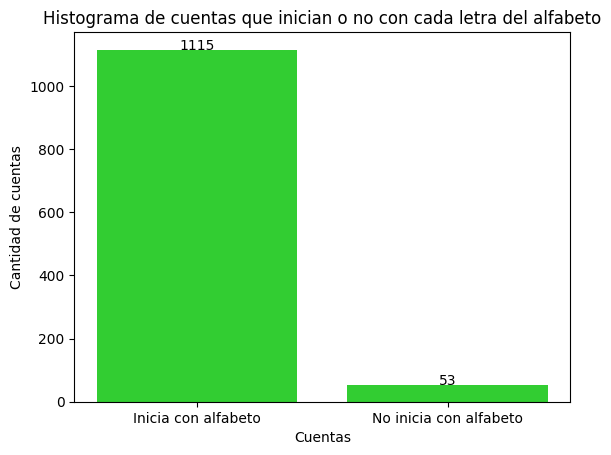

In [81]:
Etiquetas = ['Inicia con alfabeto', 'No inicia con alfabeto']

plt.bar(Etiquetas, Datos, color='limegreen')
plt.title('Histograma de cuentas que inician o no con cada letra del alfabeto')
plt.xlabel('Cuentas')
plt.ylabel('Cantidad de cuentas')

# Mostramos el número exacto de cuentas en el histograma
for i, count in enumerate(Datos):
    plt.text(i, count + 1, str(count), ha='center')

plt.show() #Mostramos el histograma

Para mostrar el histograma se obtuvieron las cuentas que coincidian o no con el patron indicado, y posteriormente se obtuvo el tamaño de cada lista para que con esos valores se pudiera graficar el histograma.

#### - ¿Cual es la cuenta de IG con mas caracteres en su nombre?

In [82]:
#Se obtienen los nombres en una lista
Nombres = df_Insta['Name'].tolist()
TamNombres = []

# Se obtiene la longitud del nombre con más caracteres
for n in Nombres:
    TamNombres.append(len(n))
MasCaracteres = max(TamNombres)
MasCaracteres

30

In [83]:
#Se obtienen los nombres de las cuentas con más caracteres en su nombre (el máx es 30)
Cuent = []
for n in range(len(TamNombres)):
    if TamNombres[n] == MasCaracteres:
        Cuent.append(Nombres[n])
Cuent

['William  Levy / Actor Producer',
 '𝐑𝐨𝐡𝐢𝐭 𝐙𝐢𝐧𝐣𝐮𝐫𝐤𝐞 ~ 𝐫𝐞𝐚𝐜𝐭𝐢𝐨𝐧𝐛𝐨𝐢 💫',
 'William  Levy / Actor Producer',
 'Shahin Samad poor شاهین صمدپور']

In [84]:
#Se obtienen las cuentas (username) que son las que tienen mas caracteres en su nombre
Cuentas = []
for i in range(len(Cuent)):
    Cuentas.append((df_Insta.Username[df_Insta['Name']==Cuent[i]]).tolist())
Cuentas

[['willevy', 'willevy'],
 ['rohittt_09_'],
 ['willevy', 'willevy'],
 ['shahinsamadpoor']]

En este caso primero se obtuvo el tamaño más grande del nombre de la cuenta el cual es de 30 caracteres, posteriormente se obtuvieron esos nombres y una vez con estos se obtuvieron las cuentas (username) que tenian en el name 30 caracteres, lo que nos da como resultado que 3 cuentas son las que tienen más caracteres en su nombre: willevy, rohittt_09_ y shahinsamadpoor.

#### - ¿Cuantas cuentas de Instagram tienen ya sea en su username o name las letras de las iniciales del primer nombre de cada uno de los integrantes de tu equipo?
Las iniciales de mi equipo son L, E y M (Luis, Esmeralda y Mónica)

In [85]:
# Patrón que contenga las iniciales de los integrantes del equipo 
patron = r'[lem]'
iniciales = re.compile(patron, re.IGNORECASE)
# Filtrar los registros que contengan las letras en las columnas 'Username' o 'Name'
cuentasIG = df_Insta[(df_Insta['Username'].str.contains(iniciales, na=False)) | (df_Insta['Name'].str.contains(iniciales, na=False))]
# Obtener la cantidad de registros que cumplen la condición
cuentasIG.shape[0]

1035

Para este punto se estableció el patro de las iniciales de los integrantes del equipo y se buscaron los registros que contenian este patron en cualquier parte del username o name, ignorando mayúsculas y mínusculas. Por lo tanto se observa que 1035 cuentas contienen las iniciales de los integrantes del equipo.

#### - Métrica que identifique las 10 cuentas más importantes de Instagram

En este caso la métrica planteada para encontrar las 10 cuentas más importantes de Instagram es con base en la cantidad de Subscriptores y Engagement, debido a que este es un indicador que sirve para medir la capacidad de interacción entre una cuenta y sus diferentes canales de comunicación y los seguidores de la misma, por lo tanto, aquellas cuentas que tengan una mayor cantidad de engagement, al mismo tiempo que tiene una gran cantidad de subscriptores, indicaría que son las de mayor importancia.

In [86]:
# Obtenemos los registros de diciembre para la métrica y los ordenamos ascentemente para obtener las cuentas
# más importantes, al menos por la métrica planteada que fue el conteo de subscribers y engagement.
cuentasImportInsta = df_Insta[df_Insta['Month'] == 'December'].sort_values(by='Subscribers o Followers', ascending=False)
cuentasImportInstaFinal = cuentasImportInsta[cuentasImportInsta['Month'] == 'December'].sort_values(by='Engagement', ascending=False)
# Obtenemos el top 10 de cuentas con mayor número de seguidores en diciembre, se eligió filtrar por diciembre
# ya que es el mes de cierre y los usuarios que hayan tenido más subscriptores se consideran los más importantes
# para Instagram
top10 = cuentasImportInstaFinal.head(10)
# Se muestra el username y cuantos subscribers tiene esa cuenta.
print(top10[['Username', 'Subscribers o Followers', 'Engagement']])

               Username  Subscribers o Followers  Engagement
3072          Leo Messi                409800000    23400000
3096              jhope                 42400000     5900000
3076            Kendall                268000000     5000000
3113       Jenna Ortega                 23800000     4900000
3102                 RM                 40400000     4600000
3116  Antonela Roccuzzo                 23700000     4600000
3075            Kylie 🤍                376300000     4300000
3098             JISOO🤍                 66700000     3800000
3114                차은우                 31600000     3600000
3119     Olivia Rodrigo                 28900000     3500000


#### - Histograma del numero de seguidores promedio por pais

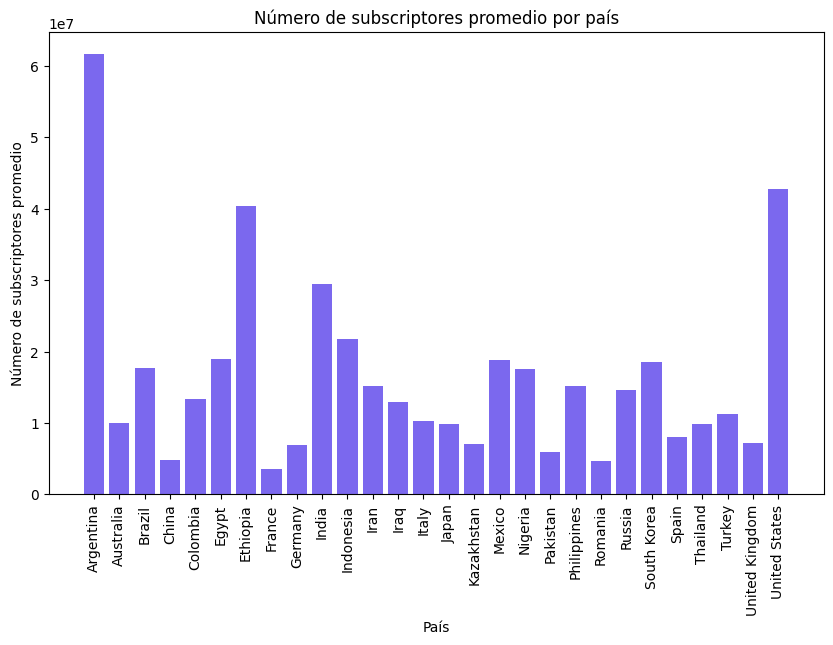

In [87]:
# Obtener los países únicos
paises = df_Insta['Country'].unique()

# Calcular el número de seguidores promedio por país
promedio_seguidores = df_Insta.groupby('Country')['Subscribers o Followers'].mean()

plt.figure(figsize=(10, 6))
plt.bar(promedio_seguidores.index, promedio_seguidores.values, color='mediumslateblue')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Número de subscriptores promedio')
plt.title('Número de subscriptores promedio por país')
plt.show()

Para el histograma anterior se agruparon los paises y con estos se obtuvieron los promedios de subscriptores que tenian cada uno, posteriormente estos promedios se graficaron en el histograma.

#### - Serie con todas las categorias existentes en todos los archivos de Instagram

In [88]:
# Obtener las categorías únicas (todas)
df_Insta['Category'] = df_Insta['Category1'].combine_first(df_Insta['Category2'])
TodasCat = (df_Insta['Category'].unique()).tolist()
TodasCat

['Lifestyle',
 'Sports with a ball',
 'Business & Careers',
 'Music',
 'Fashion',
 'Cinema & Actors/actresses',
 'Shows',
 'Modeling',
 'Beauty',
 'Finance & Economics',
 'Photography',
 'Family',
 'Art/Artists',
 'Cars & Motorbikes',
 'Computers & Gadgets',
 'Humor & Fun & Happiness',
 'Literature & Journalism',
 'Nature & landscapes',
 'Extreme Sports & Outdoor activity',
 'Education',
 'Management & Marketing',
 'Clothing & Outfits',
 'Luxury',
 'Fitness & Gym',
 'Science',
 'Machinery & Technologies',
 'Winter sports',
 'Racing Sports',
 'Crypto',
 'Gaming',
 'Water sports',
 'Travel']

Para la serie lo que se hizo fue crear una nueva columna llamada Category, la cual contenia tanto a Category1 como a Category2, y posteriormente se obtuvieron los valores únicos de esta columna y se guardaron en una lista.

#### - Serie con todos los paises que encuentre en los archivos

In [89]:
# Obtener los países únicos (todos)
TodosPaises= [] 
TodosPaises = (df_Insta['Country'].unique()).tolist()
TodosPaises

['United States',
 'South Korea',
 'Indonesia',
 'India',
 'Egypt',
 'Brazil',
 'Italy',
 'Mexico',
 'Colombia',
 'Argentina',
 'Philippines',
 'Germany',
 'Russia',
 'Turkey',
 'Iran',
 'Spain',
 'Thailand',
 'Iraq',
 'United Kingdom',
 'Japan',
 'Pakistan',
 'Romania',
 'France',
 'Nigeria',
 'Kazakhstan',
 'Ethiopia',
 'Australia',
 'China']

Para la serie de paises solamente se obtuvieron los valores unicos de la columna Country, de esta forma los valores se guardaron en una lista para crear la serie.

#### - Histograma el numero de seguidores por categoria

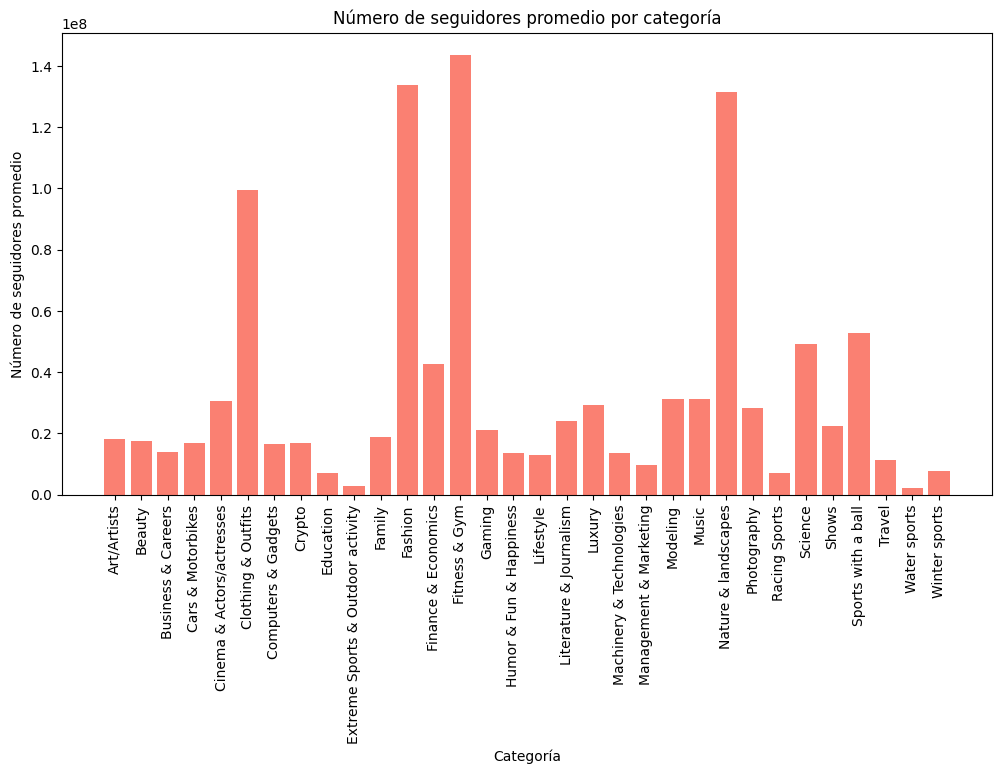

In [90]:
# Agrupamos los datos por categoría y luego se obtiene el promedio de suscriptores
seguidores_por_categoria = df_Insta.groupby('Category')['Subscribers o Followers'].mean()

plt.figure(figsize=(12, 6))
plt.bar(seguidores_por_categoria.index, seguidores_por_categoria.values, color='salmon')
plt.xlabel('Categoría')
plt.ylabel('Número de seguidores promedio')
plt.title('Número de seguidores promedio por categoría')
plt.xticks(rotation=90)  
plt.show()

Para crear un histograma con el numero de seguidores promedio por categoria se agruparon las categorias (todas ya se encontraban en la columna Category creada anteriormente) y posteriormente se obtuvo el promedio por Subscribers o Followers, y estos valores se graficaron en el histograma.

## Obtención de datos de TikTok

#### - Numero total de cuentas distintas

In [91]:
df_Tik_tok.Username.nunique()

2581

#### - Calcular el promedio de seguidores, authentic, engagement,  de cada cuenta.

Es decir, cada red social cuenta con 4 archivos de 4 meses distintos, si una cuenta aparece en los 4 meses, debera calcular el promedio de esos 4 meses, si una cuenta solo aparece 2 meses, se hara el promedio de esos dos meses y asi sucesivamente. SI el valor es nulo, vacio, N/A, o 0 no se debe promediar.

In [96]:
# Pasaremos los followers a un dato de tipo numero¡ico para que lo podamos manejar, y asi sucesivamente con los demas
df_Tik_tok['Followers o Suscribers'] = df_Tik_tok['Followers o Suscribers'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Tik_tok['Likes'] = df_Tik_tok['Likes'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Tik_tok['Views'] = df_Tik_tok['Views'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Tik_tok['Shares'] = df_Tik_tok['Shares'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Tik_tok['Comments'] = df_Tik_tok['Comments'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)

In [97]:
# Suponiendo que tienes un DataFrame llamado 'data' con las columnas 'Username', 'Followers', 'Authentic' y 'Engagement'

# Agrupar los datos por cuenta
grouped_data = df_Tik_tok.groupby('Username')

# Filtrar las cuentas que aparecen en los cuatro meses
filtered_data = grouped_data.filter(lambda x: len(x) == 4)

# Seleccionar solo las columnas numéricas para el cálculo del promedio
numeric_columns = ['Followers o Suscribers', 'Likes', 'Views', 'Shares', 'Comments']
filtered_data[numeric_columns] = filtered_data[numeric_columns].apply(pd.to_numeric)

# Calcular el promedio de seguidores, authentic y engagement para cada cuenta seleccionada
promedios = filtered_data.groupby(['Username', 'Month'], as_index=False)[numeric_columns].mean()

# Mostrar los resultados
promedios

,Username,Month,Followers o Suscribers,Likes,Views,Shares,Comments
0,abbieherbert,December,14400000.0,406000.0,3600000.0,301.0,698.0
1,abbieherbert,June,13200000.0,557000.0,4200000.0,959.0,1400.0
2,abbieherbert,November,14200000.0,459100.0,4300000.0,372.0,671.0
3,abbieherbert,September,13800000.0,400700.0,3700000.0,581.0,917.0
4,abir.sag,December,18900000.0,236000.0,3200000.0,1100.0,4200.0
...,...,...,...,...,...,...,...
653,yurielkysojeda,September,14800000.0,277300.0,2200000.0,2300.0,1300.0
654,zodiac.boyfriend,December,2700000.0,386700.0,4000000.0,5900.0,7400.0
655,zodiac.boyfriend,June,1800000.0,272700.0,1900000.0,3600.0,6800.0
656,zodiac.boyfriend,November,2400000.0,207300.0,1600000.0,2600.0,2100.0


#### - Metrica de Valor de cada cuenta. 

Para este punto debe utilizar los  promedios calculados en el inciso anterior : Promedio views/Promedio followers, Promedio likes/Promedio followers, Promedio comments/Promedio followers, Promedio shares / Pormedio followers.

- HIPOTESIS

Para realizar la metrica de valores, tomare en cuenta el promedio de solo del mes de diciembre, ya que es fin de año, y despues tomare los followers y tomare los likes que recibe, ya que tiene un poco mas de valor y, un like es mas facil que la gente de un like que un comentario

In [99]:
Mean_December = promedios.loc[(promedios['Month']=='December')]
metrica_valores = Mean_December.groupby('Username')[numeric_columns].agg('mean')
metrica_valores

,Followers o Suscribers,Likes,Views,Shares,Comments
Username,,,,,
abbieherbert,14400000.0,406000.0,3600000.0,301.0,698.0
abir.sag,18900000.0,236000.0,3200000.0,1100.0,4200.0
addisonre,88700000.0,304900.0,5300000.0,2000.0,2400.0
adrianbliss,7600000.0,444000.0,2800000.0,1400.0,576.0
albert_cancook,10200000.0,201900.0,2500000.0,415.0,702.0
...,...,...,...,...,...
williesalim,20900000.0,888600.0,13000000.0,3800.0,5000.0
wuesilva,14300000.0,305400.0,3000000.0,2500.0,1400.0
xxlechuga,7100000.0,262900.0,1500000.0,485.0,1000.0


In [101]:
df_Metrica = metrica_valores.sort_values('Followers o Suscribers', ascending=False)
df_Metrica['Folowers \n Suscriptores / Likes'] = df_Metrica['Followers o Suscribers'] / df_Metrica['Likes']

In [103]:
df_Metrica['Folowers \n Suscriptores / Shares'] = df_Metrica['Followers o Suscribers'] / df_Metrica['Shares']
df_Metrica['Folowers \n Suscriptores / Views'] = df_Metrica['Followers o Suscribers'] / df_Metrica['Views']
df_Metrica['Folowers \n Suscriptores / Comments'] = df_Metrica['Followers o Suscribers'] / df_Metrica['Comments']
df_Metrica.loc[:, ['Followers o Suscribers', 'Folowers \n Suscriptores / Likes', 'Folowers \n Suscriptores / Shares', 'Folowers \n Suscriptores / Views', 'Folowers \n Suscriptores / Comments']].sort_values('Followers o Suscribers', ascending=False).head(10)

,Followers o Suscribers,Folowers \n Suscriptores / Likes,Folowers \n Suscriptores / Shares,Folowers \n Suscriptores / Views,Folowers \n Suscriptores / Comments
Username,,,,,
khaby.lame,153100000.0,127.583333,66565.217391,14.443396,7360.576923
charlidamelio,149000000.0,188.631472,49666.666667,19.102564,21594.202899
addisonre,88700000.0,290.915054,44350.000000,16.735849,36958.333333
kimberly.loaiza,70200000.0,79.474697,18000.000000,9.116883,7977.272727
therock,64300000.0,102.715655,8243.589744,17.861111,8037.500000
domelipa,62000000.0,79.497371,24800.000000,10.689655,11698.113208
mrbeast,60300000.0,17.228571,8375.000000,2.065068,1957.792208
kyliejenner,50400000.0,63.548102,31500.000000,6.720000,18000.000000
kallmekris,47600000.0,66.526904,22666.666667,13.222222,12526.315789


- CONCLUSION

En esto podemos concluir que tomando las 10 personas mas famosas de tik tok vemos que pues el promedio de los shares es mas grande que el de todos los demas, asi que por eso tomare la metrica de suscriptores y shares

#### - Graficar en un histograma el numero de cuentas que inicien por cada letra del alfabeto (Mayusculas y minusculas son tomadas de igual forma) y agrupar en una sola categoria todos los que no comiencen con una letra del alfabeto.

In [104]:
# Primero buscaremos el patron que tenga que inice con las letras del alfabeto 

patron_Alfabeto = r'^[a-zA-Z]'

Alfabeto = []
S_Alfabeto = []

for username in df_Tik_tok['Username']:
    if re.search(patron_Alfabeto, username):
        Alfabeto.append(username)
    else:
        S_Alfabeto.append(username)

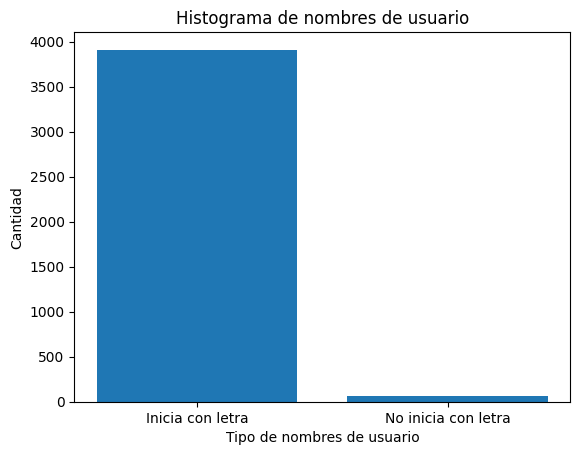

In [105]:
# Contar la cantidad de nombres de usuario que comienzan con el alfabeto y los que no
nombres_con_alfabeto = len(Alfabeto)
nombres_sin_alfabeto = len(S_Alfabeto)

# Crear las etiquetas y los datos para el histograma
etiquetas = ['Inicia con letra', 'No inicia con letra']
datos = [nombres_con_alfabeto, nombres_sin_alfabeto]

# Crear el histograma
plt.bar(etiquetas, datos)
plt.xlabel('Tipo de nombres de usuario')
plt.ylabel('Cantidad')
plt.title('Histograma de nombres de usuario')
plt.show()

#### - ¿Cual es la cuenta de Tik Tok con mas caracteres en su nombre?

In [106]:
nombres = []
for nombre in df_Tik_tok['Name']:
    Tam = len(nombre)
    nombres.append(Tam)

# Ya que tenemos todos los tamaños de los nombres ahora aplicaremos la funcion max para encontar el mayor

max(nombres)

32

In [108]:
# Como tenemos que el numero MAXIMO de caracteres es 32 buscaremos nadamas la palabra que tenga 32 de largo
for nombre in df_Tik_tok['Name']:
    Tam = len(nombre)
    if Tam == max(nombres):
        print(nombre)

Prite Netijen Netirattanapaiboon
Prite Netijen Netirattanapaiboon
Prite Netijen Netirattanapaiboon


#### - ¿Cuantas cuentas de TikTok tienen el nombre de alguno de estos animales: perro, gato, leon, tigre?

In [109]:
animales_patron = r'perro|gato|leon|tigre'
for nombre in df_Tik_tok['Username']:
    nombre.lower()
    buscar = re.search(animales_patron, nombre)
    if buscar:
        print(nombre)

deiveleonardooficial
piperrockelle
deiveleonardooficial
leonardberducat
deiveleonardooficial
joesantagato
leonardzbant
piperrockelle


#### - Defina una metrica que identifique las 10 cuentas mas importantes de TikTok

Se tomo en cuenta los suscriptores, y se reviso el perfil en Tik Tok, para ver si era cierta la informacion, y con base en los likes y compartidas que es lo que mas sucede en Tik Tok.

In [111]:
# Primero ordenaremos los valores mayor a menor
df_ordenado = df_Tik_tok.sort_values('Followers o Suscribers', ascending=False)
df_ordenado

,Month,Username,Name,Followers o Suscribers,Likes,Views,Shares,Comments
1016,December,khaby.lame,Khabane lame,153100000,1200000,10600000,2300,20800
2016,November,khaby.lame,Khabane lame,152000000,1800000,15000000,3200,6500
1,September,khaby.lame,Khabane lame,149200000,2300000,17300000,8700,15200
1037,December,charlidamelio,charli d’amelio,149000000,789900,7800000,3000,6900
2033,November,charlidamelio,charli d’amelio,148400000,641900,8600000,2500,9700
...,...,...,...,...,...,...,...,...
776,September,soapinmymouthoncemore,tedwards,5100,189600,943300,3100,1900
3473,June,juliaaliceaa,jujuuu,3700,550300,2200000,14300,3100
3051,June,alexbatistao,Alex ramos22,3200,46600,951700,19400,1700
3075,June,apollolikesblu,Apollolol,3000,124500,702300,2100,9500


In [112]:
df_F = df_ordenado.loc[df_ordenado['Month']=='December'].head(10)
df_F

,Month,Username,Name,Followers o Suscribers,Likes,Views,Shares,Comments
1016,December,khaby.lame,Khabane lame,153100000,1200000,10600000,2300,20800
1037,December,charlidamelio,charli d’amelio,149000000,789900,7800000,3000,6900
1091,December,bellapoarch,Bella Poarch,92600000,482200,6000000,1500,4800
1168,December,addisonre,Addison,88700000,304900,5300000,2000,2400
1126,December,willsmith,Will Smith,73000000,514600,4700000,2000,2200
1099,December,zachking,Zach King,72100000,466400,11500000,1500,1600
1030,December,kimberly.loaiza,Kimberly Loaiza,70200000,883300,7700000,3900,8800
1469,December,cznburak,cznburak,66300000,205100,3200000,681,1700
1059,December,therock,The Rock,64300000,626000,3600000,7800,8000
1062,December,domelipa,domelipa,62000000,779900,5800000,2500,5300


#### - Grafique una serie de tiempo de las cuentas que tengan al menos 3 datos de meses distintos de los promedios obtenidos en el inciso ii.

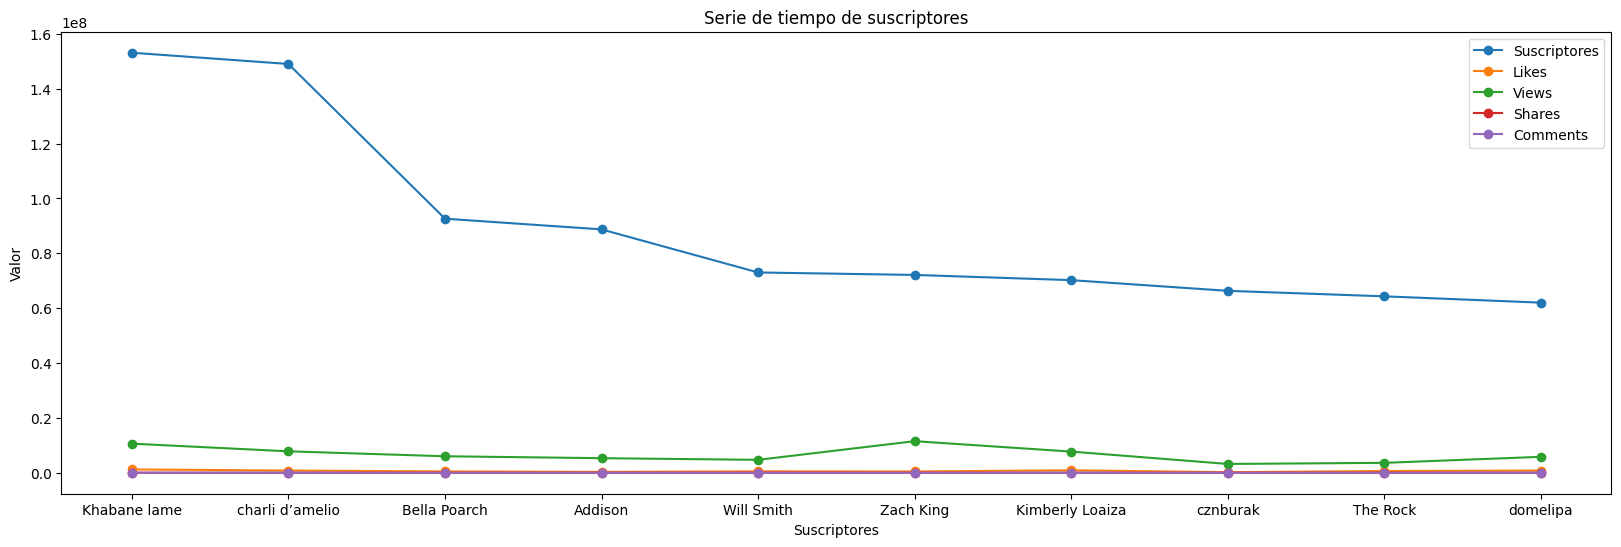

In [113]:
# Crear un nuevo DataFrame con los datos proporcionados
data = {
    'Name': df_F['Name'],
    'Suscriptores': df_F['Followers o Suscribers'],
    'Likes': df_F['Likes'], 
    'Views' : df_F['Views'], 
    'Shares' : df_F['Shares'], 
    'Comments' : df_F['Comments']
}

df = pd.DataFrame(data)
df.set_index('Name', inplace=True)

# Transponer el DataFrame
df_transposed = df.T

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20, 6))

# Graficar la serie de tiempo de suscriptores para cada usuario en una sola gráfica
for username in df_transposed.index:
    ax.plot(df_transposed.columns, df_transposed.loc[username], marker='o', label=username)

# Personalizar el gráfico
ax.set_xlabel('Suscriptores')
ax.set_ylabel('Valor')
ax.set_title('Serie de tiempo de suscriptores')
ax.legend()

# Mostrar el gráfico
plt.show()

## Obtención de datos de Youtube

#### - Numero total de cuentas distintas

In [114]:
# Muestra las cuentas duplicadas
df_Youtube[df_Youtube.Username.duplicated(keep=False)]

,Country,Month,Name,Username,Subscribers,Views,Likes,Comments,Category1,Category2
71,-,June,Britain's Got Talent,BritainsGotTalent09,18.4M,255.7K,2.6K,211,Music & Dance,Movies
188,Argentina,June,RobleisIUTU,RobleisIUTU,17.1M,1M,71.9K,1.8K,Animation,Video games
189,Argentina,June,Bizarrap,Bizarrap,14.3M,23M,1.3M,68.8K,Music & Dance,Movies
193,Argentina,June,Rubius Z,elrubius,11.5M,1.7M,142.8K,1.8K,Movies,Animation
200,Brazil,June,LUCCAS NETO - LUCCAS TOON,luccasneto,37.5M,467.9K,12K,N/A',Movies,Animation
...,...,...,...,...,...,...,...,...,...,...
4031,India,December,Sanam,Sanam,10.3M,58.7K,6.3K,293,Music & Dance,Movies
4033,United States,December,TopMovieClips,TopMovieClips,10.3M,124.5K,2.1K,140,Movies,Animation
4038,Russia,December,Wylsacom,Wylsacom,10.3M,291.7K,13K,950,Science & Technology,News & Politics
4041,Brazil,December,Laurinha e Helena - Clubinho da Laura,JessicaJulioeBaby,10.3M,83.5K,1.4K,0,Movies,Animation


In [115]:
# Número de cuentas distintas
df_Youtube.Username.nunique()

321

#### - Promedio de seguidores, views, likes, comments de cada cuenta

In [116]:
# Transformación de los datos a números
df_Youtube['Subscribers'] = df_Youtube['Subscribers'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Youtube['Views'] = df_Youtube['Views'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Youtube['Likes'] = df_Youtube['Likes'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9', "N/A'": '0'}, regex=True).map(pd.eval).astype(int)
df_Youtube['Comments'] = df_Youtube['Comments'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9', "N/A'": '0'}, regex=True).map(pd.eval).astype(int)

In [117]:
df_Youtube

,Country,Month,Name,Username,Subscribers,Views,Likes,Comments,Category1,Category2
1,-,June,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",10600000,348,3,0,Animation,Toys
3,-,June,Blippi - Educational Videos for Kids,Blippi - Educational Videos for Kids,15700000,1200000,4200,0,Education,Toys
14,-,June,Трум Трум,Трум Трум,13700000,103200,1800,83,Humor,Toys
15,-,June,Dang Matt Smith,dangmattsmith,13700000,103500,4400,332,Animation,Humor
18,-,June,DuDuPopTOY,DuDuPopTOY,10500000,11100,109,0,Animation,Humor
...,...,...,...,...,...,...,...,...,...,...
4033,United States,December,TopMovieClips,TopMovieClips,10300000,124500,2100,140,Movies,Animation
4036,United States,December,Topper Guild,topperguild,10300000,288900,5900,680,Animation,Humor
4038,Russia,December,Wylsacom,Wylsacom,10300000,291700,13000,950,Science & Technology,News & Politics
4041,Brazil,December,Laurinha e Helena - Clubinho da Laura,JessicaJulioeBaby,10300000,83500,1400,0,Movies,Animation


In [118]:
# Calculamos el promedio de seguidores, views, likes, comments  de cada cuenta
mean_subscribers = df_Youtube['Subscribers'].mean()
mean_views = df_Youtube['Views'].mean()
mean_comments = df_Youtube['Comments'].mean()
mean_likes = df_Youtube['Likes'].mean()

columnas = ['Subscribers','Views','Comments', 'Likes']
Promedios = df_Youtube.groupby(['Username', 'Month'])[columnas].mean()
Promedios.head(10)

Subscribers      Views  Comments    Likes
Username            Month                                               
#Refúgio Mental     December    12800000.0   142100.0      52.0   4900.0
                    November    12800000.0   142100.0      52.0   4900.0
                    September   12800000.0   341700.0      89.0   9800.0
0214mex             December    10400000.0   592200.0    1100.0  18500.0
                    June        10300000.0  1300000.0    1400.0  30900.0
                    November    10400000.0   592200.0    1100.0  18500.0
                    September   10400000.0  1700000.0    1800.0  43800.0
5-Minute Crafts DIY December    20900000.0    11100.0       7.0    240.0
                    November    20900000.0    11100.0       7.0    240.0
                    September   20900000.0    18300.0       9.0    303.0

#### - Métricas de Valor de cada cuenta

In [119]:
metricaYT = []
for c in range(len(Promedios)):
    # Promedio views/Promedio Followers
    metricaYT.append(Promedios['Views']/Promedios['Subscribers'])
    # Promedio likes/Promedio Followers
    metricaYT.append(Promedios['Likes']/Promedios['Subscribers'])
    # Promedio comments/Promedio Followers
    metricaYT.append(Promedios['Comments']/Promedios['Subscribers'])
    
print(metricaYT[0])
print(metricaYT[1])
print(metricaYT[2])

Username           Month    
#Refúgio Mental    December     0.011102
                   November     0.011102
                   September    0.026695
0214mex            December     0.056942
                   June         0.126214
                                  ...   
✿ Kids Diana Show  June         0.118012
설기양SULGI           December     0.061946
                   June         0.083939
                   November     0.048459
                   September    0.091010
Length: 855, dtype: float64
Username           Month    
#Refúgio Mental    December     0.000383
                   November     0.000383
                   September    0.000766
0214mex            December     0.001779
                   June         0.003000
                                  ...   
✿ Kids Diana Show  June         0.000423
설기양SULGI           December     0.001207
                   June         0.002235
                   November     0.001321
                   September    0.002114
Length: 855,

#### - Histograma con el número de cuentas que inician por cada letra del alfabeto y por símbolos

In [120]:
# Primero buscaremos el patron que tenga que inice con las letras del alfabeto 

patron_Alfabeto = r'^[a-zA-Z]'

Alfabeto = []
S_Alfabeto = []

for username in df_Youtube['Username']:
    if re.search(patron_Alfabeto, username):
        Alfabeto.append(username)
    else:
        S_Alfabeto.append(username)

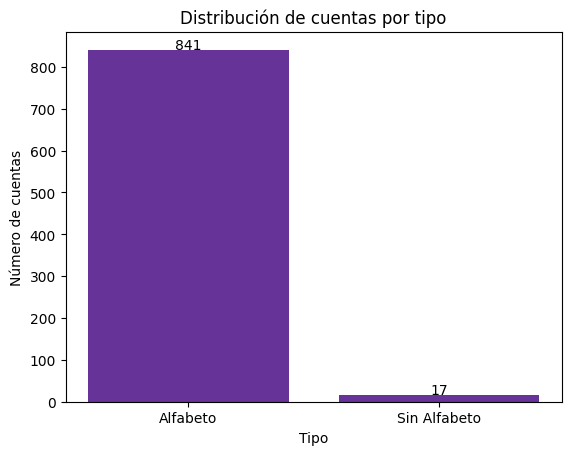

In [121]:
countA = len(Alfabeto)
countSA = len(S_Alfabeto)

etiquetas = ['Alfabeto', 'Sin Alfabeto']

# Crear los valores para el histograma
vals = [countA, countSA]

# En esta parte se crea el histograma
plt.bar(etiquetas, vals, color='rebeccapurple')
plt.xlabel('Tipo')
plt.ylabel('Número de cuentas')
plt.title('Distribución de cuentas por tipo')

# Mostramos el número exacto de cuentas en el histograma
for i, count in enumerate(vals):
    plt.text(i, count + 1, str(count), ha='center')

plt.show()


#### - ¿Cuantas cuentas de YouTube tienen ya sea en su username o name las letras de las iniciales del primer nombre de cada uno de los integrantes de tu equipo?
Las iniciales de mi equipo son L, E y M (Luis, Esmeralda y Mónica)

In [122]:
# Obtenemos las cuentas que inicien por E, e, M, m
# Patrón que contenga las iniciales de los integrantes del equipo 
patron = r'[lem]'
iniciales = re.compile(patron, re.IGNORECASE)
# Filtrar los registros que contengan las letras en las columnas 'Username' o 'Name'
cuentasYT = df_Youtube[(df_Youtube['Username'].str.contains(iniciales, na=False)) | (df_Youtube['Name'].str.contains(iniciales, na=False))]
# Obtener la cantidad de registros que cumplen la condición
cuentasYT.shape[0]

740

Por lo tanto, son 740 cuentas que tienen como inicial L,l,E,e,M,m en username o name.

#### - Métrica que identifique las 10 cuentas más importantes de YouTube
Se tomaron en cuenta la cantidad de subscriptores y la cantidad de comentarios, ya que al tener muchos subscriptores es más probable que si en dado caso, anunciarán publicidad acerca de algún producto, llegaría a más personas pues no son personas que solo estén suscritas, si no que participan en el canal de Youtube, nos aseguramos de eso gracias a la obtención de comentarios.

In [123]:
# Obtenemos los registros de diciembre para la métrica y los ordenamos ascentemente para obtener las cuentas
# más importantes, al menos por la métrica planteada que fue el conteo de subscribers y engagement.
cuentasImportYT = df_Youtube[df_Youtube['Month'] == 'December'].sort_values(by='Subscribers', ascending=False)
cuentasImportYTFinal = cuentasImportYT[cuentasImportYT['Month'] == 'December'].sort_values(by='Comments', ascending=False)
# Obtenemos el top 10 de cuentas con mayor número de seguidores en diciembre, se eligió filtrar por diciembre
# ya que es el mes de cierre y los usuarios que hayan tenido más subscriptores se consideran los más importantes
# para Instagram
top10 = cuentasImportYTFinal.head(10)
# Se muestra el username y cuantos subscribers tiene esa cuenta.
print(top10[['Username', 'Subscribers', 'Comments']])

          Username  Subscribers  Comments
3454      Bizarrap     16600000    134900
3134    AddictedA1     37300000    110000
3071       MrBeast    117000000     99900
3961       Airrack     10700000     33100
3114            A4     42500000     27100
3423  alanalan9635     17400000     26500
3547           ERB     14800000     20900
3430       Sidemen     17200000     17500
3446  TheBrianMaps     16800000     11800
3252    Logan Paul     23600000     11500


#### - Cree una serie con todas los países existentes en todos los archivos de YouTube

In [124]:
# Obtener los países únicos (todos)
TodosPaises= [] 
TodosPaises = (df_Youtube['Country'].unique()).tolist()
TodosPaises

['-',
 'Argentina',
 'Brazil',
 'Colombia',
 'France',
 'India',
 'Indonesia',
 'Iraq',
 'Japan',
 'Mexico',
 'Pakistan',
 'Peru',
 'Philippines',
 'Russia',
 'Saudi Arabia',
 'Spain',
 'Thailand',
 'United Kingdom',
 'United States',
 'Turkey']

#### - Histograma del número de seguidores promedio por país.

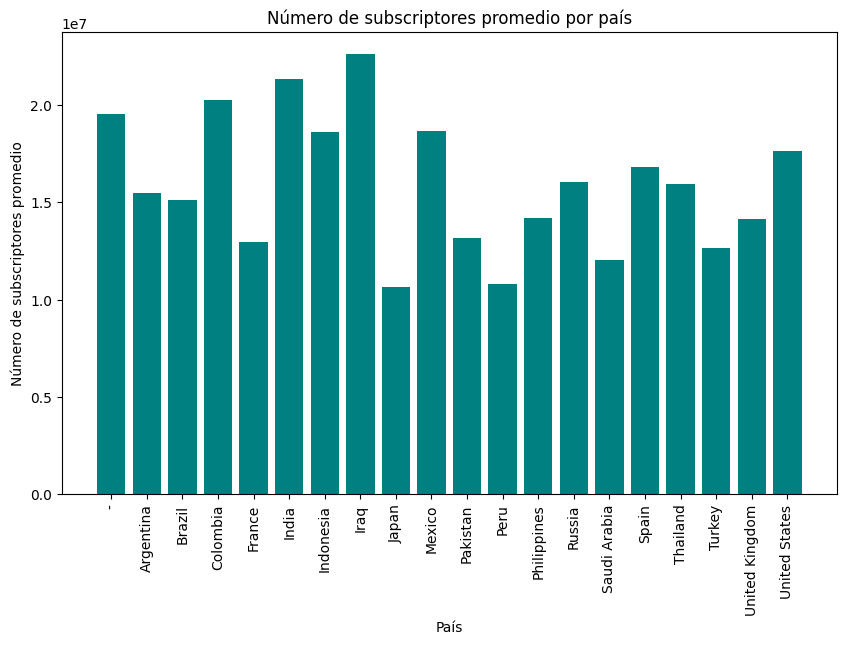

In [125]:
# Obtener los países únicos
paises = df_Youtube['Country'].unique()

# Calcular el número de seguidores promedio por país
promedio_seguidores = df_Youtube.groupby('Country')['Subscribers'].mean()

plt.figure(figsize=(10, 6))
plt.bar(promedio_seguidores.index, promedio_seguidores.values, color='teal')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Número de subscriptores promedio')
plt.title('Número de subscriptores promedio por país')
plt.show()

#### - Cree una serie con todas las categorías existentes en todos los archivos de YouTube

In [126]:
# Obtener las categorías únicas (todas)
df_Youtube['Category'] = df_Youtube['Category1'].combine_first(df_Youtube['Category2'])
TodasCat = (df_Youtube['Category'].unique()).tolist()
TodasCat

['Animation',
 'Education',
 'Humor',
 'Movies',
 'Music & Dance',
 'Autos & Vehicles',
 'Video games',
 'Toys',
 'Fashion',
 'Science & Technology',
 'News & Politics',
 'DIY & Life Hacks',
 'Beauty',
 'Fitness',
 'Food & Drinks',
 'Design/art',
 'Sports',
 'ASMR',
 'Animals & Pets',
 'Health & Self Help']

#### - Histograma del número de seguidores por categoría

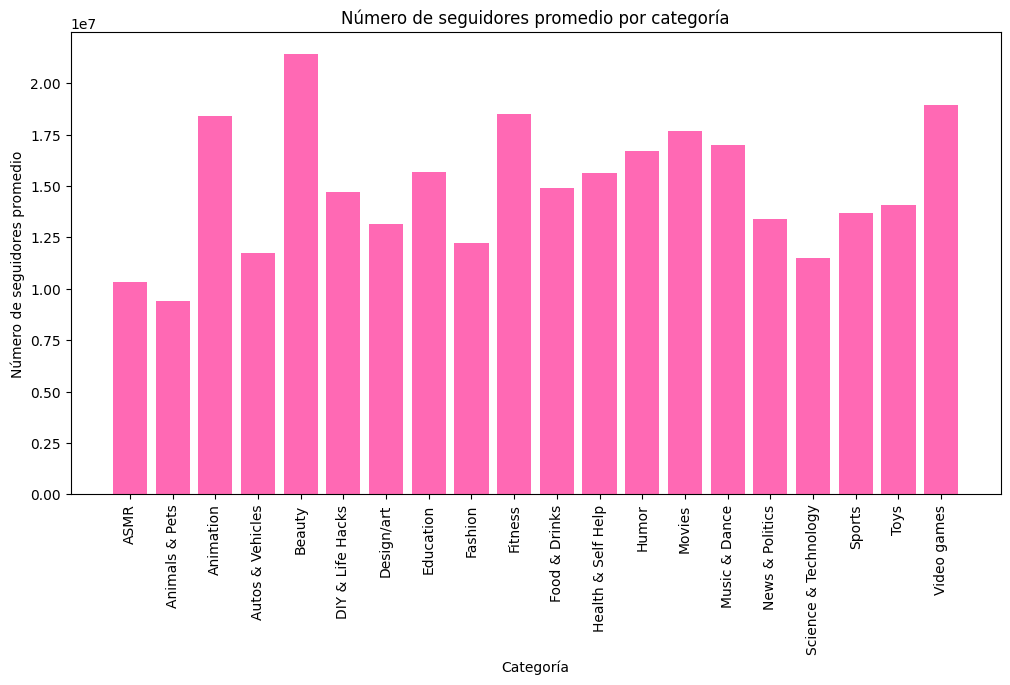

In [127]:
# Agrupamos los datos por categoría y luego se obtiene el promedio de suscriptores
seguidores_por_categoria = df_Youtube.groupby('Category')['Subscribers'].mean()
plt.figure(figsize=(12, 6))
plt.bar(seguidores_por_categoria.index, seguidores_por_categoria.values, color='hotpink')
plt.xlabel('Categoría')
plt.ylabel('Número de seguidores promedio')
plt.title('Número de seguidores promedio por categoría')
plt.xticks(rotation=90)  
plt.show()

## ¿Cuáles son las 5 cuentas más importantes de las 3 redes sociales?

#### - Instagram
Para el caso de Instagram y tomando en cuenta principalmente la métrica planteada por el equipo se puede observar que las 5 cuentas más importantes para esta red social son: 
1. Leo Messi
2. jhope
3. Kendall
4. Jenna Ortega
5. RM

Esto debido a que como se mencionaba en ese punto, estas cuentas son las que tienen una mayor cantidad tanto de subscriptores o seguidores, como de interacciones entre los propietarios de estas cuentas y sus seguidores, lo que significa que de forma general, tienen un mayor nivel de importancia actualmente en la sociedad.


#### - TikTok
En TikTok las 5 cuantas más importantes de acuerdo con la métrica planteada fueron:
1. khaby.lame
2. charlidamelio
3. bellapoarch
4. addisonre
5. willsmith
Se tomo en cuenta los suscriptores, y se reviso el perfil en Tik Tok, para ver si era cierta la informacion, y con base en los likes y compartidas que es lo que mas sucede en Tik Tok se pudo determinar que esas fueron las cuentas más importantes.


#### - Youtube 
Las 5 cuentas más importantes de acuerdo con la métrica planteada fueron:
1. MrBeast6000
2. Harsh Beniwal
3. Bizarrap
4. Bad Bunny 
5. MissaSinfonia 

Recordemos que la métrica evaluaba a las cuentas por su número de subscriptores y por el número de comentarios, las cuentas que tuvieran la mayor cantidad en ambos parámetros serían las cuentas más importantes de Youtube. Cabe mencionar que filtramos estos datos con el mes de diciembre para obtener los datos más recientes.